In [ ]:
"""
    - 概述
        - 机器学习的问题
            - 建模问题
                - 所谓机器学习，在形式上可这样理解：在数据对象中通过统计或推理的方法，寻找一个接受特定输入X，并给出预期输出Y的功能函数f，即Y=f(X)。
            - 评估问题
                - 针对已知的输入，函数给出的输出(预测值)与实际输出(目标值)之间存在一定的误差，因此需要构建一个评估体系，根据误差的大小判定函数的优劣。
            - 优化问题
                - 学习的核心在于改善性能，通过数据对算法的反复锤炼，不断提升函数预测的准确性，直至获得能够满足实际需求的最优解，这个过程就是机器学习。
        - 机器学习的种类
            - 监督学习、无监督学习、半监督学习、强化学习
                - 有监督学习：用已知输出评估模型的性能。
                - 无监督学习：在没有已知输出的情况下，仅仅根据输入信息的相关性，进行类别的划分。
                - 半监督学习：先通过无监督学习划分类别，再根据人工标记通过有监督学习预测输出。
                - 强化学习：通过对不同决策结果的奖励和惩罚，使机器学习系统在经过足够长时间的训练以后，越来越倾向于给出接近期望结果的输出。

            - 批量学习和增量学习
                - 批量学习：将学习的过程和应用的过程截然分开，用全部的训练数据训练模型，然后再在应用场景中实现预测，当预测结果不够理想时，
                  重新回到学习过程，如此循环。
                - 增量学习：将学习的过程和应用的过程统一起来，在应用的同时以增量的方式，不断学习新的内容，边训练边预测。
        - 机器学习的一般过程
            - 数据处理
                - 数据收集 （数据检索、数据挖掘、爬虫）
                - 数据清洗
                - 特征工程
            - 机器学习
                - 选择模型 （算法）
                - 训练模型 （算法）
                - 评估模型 （工具、框架、算法知识）
                - 测试模型
            - 业务运维
                - 应用模型
                - 维护模型
        - 机器学习的典型应用
            - 股价预测、推荐引擎、自然语言识别、语音识别、图像识别、人脸识别
        - 机器学习的基本问题
            - 回归问题：根据已知的输入和输出寻找某种性能最佳的模型，将未知输出的输入代入模型，得到连续的输出。
            - 分类问题：根据已知的输入和输出寻找某种性能最佳的模型，将未知输出的输入代入模型，得到离散的输出。
            - 聚类问题：根据已知输入的相似程度，将其划分为不同的群落。
            - 降维问题：在性能损失尽可能小的前提下，降低数据的复杂度。
    - 数据预处理(数据预处理的过程： 输入数据 -> 模型 -> 输出数据)
        - 均值移除(标准化)
        - 范围缩放
        - 归一化
        - 二值化
        - 独热编码
        - 标签编码
    - 线性回归(基于模型的算法)
        - 评估训练结果误差（metrics）
        - 模型的保存和加载
        - 岭回归
        - 多项式回归
    - 决策树(基于实例的算法)
    - 人工分类
    - 逻辑分类
    - 朴素贝叶斯分类
    - 决策树分类
"""


In [ ]:
"""
    均值移除(标准化)
        - 由于一个样本的不同特征值差异较大，不利于使用现有机器学习算法进行样本处理。均值移除可以让样本矩阵中的每一列的平均值为0，标准差为1。
            - 如何使样本矩阵中的每一列的平均值为0呢？
                例如有一列特征值表示年龄： 17, 20, 23
                mean = (17 + 20 + 23)/3 = 20
                a' = -3
                b' =  0
                c' =  3
                完成！
            - 如何使样本矩阵中的每一列的标准差为1呢？
                a' = -3
                b' =  0
                c' =  3
                s' = std(a', b', c')
                [a'/s',  b'/s',  c'/s']
        - 均值移除API
            from sklearn import preprocessing as pp
            A = pp.scale(array)
                - scale:                用于对函数进行预处理，实现均值移除。
                - array:                为原数组，返回A为均值移除后的结果。

"""
import numpy as np
# 数据预处理相关库
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])

std_samples = pp.scale(raw_samples)
print(std_samples)
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

In [ ]:
"""
    范围缩放(等比例)
        - 将样本矩阵中的每一列的最小值和最大值设定为相同的区间，统一各列特征值的范围。一般情况下会把特征值缩放至[0, 1]区间。
            - 如何使一组特征值的最小值为0呢？
                - 例如有一列特征值表示年龄： [17, 20, 23]
                - 每个元素减去特征值数组所有元素的最小值即可：[0, 3, 6]
            - 如何使一组特征值的最大值为1呢？
                - [0, 3, 6]
                - 把特征值数组的每个元素除以最大值即可：[0, 1/2, 1]
        - 范围缩放API：
            from sklearn import preprocessing as pp
            - mms = pp.MinMaxScaler(feature_range=(0,1))
                - feature_range                 缩放范围
            - mms.fit_transform(array)
                - array                         原始样本矩阵
"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])
# 创建MinMax缩放器
mms = pp.MinMaxScaler(feature_range=(0, 1))
# 调用mms对象的方法执行缩放操作, 返回缩放过后的结果
result = mms.fit_transform(raw_samples)
print(result)

print("*" * 50)
#案例（求取直线 y = kx + b 中的 k 与 b,并通过直接方程求取对应的 y）
mms_simple = raw_samples.copy()
#拿到原始数据的每一列的数据
for col in mms_simple.T:
    #拿到每一列的最小值
    col_min = col.min()
    #拿到每一列的最大值
    col_max = col.max()
    a = np.array([
        [col_min, 1],
        [col_max, 1]])
    b = np.array([0, 1])
    #获取未知数x的值
    x = np.linalg.solve(a, b)
    # print(x)
    #求取每一个kx，并将结果赋值给col变量
    col *= x[0]
    #将col与b相加,并将结果赋值给col变量
    col += x[1]
#返回kx+b所求得的所有结果
print(mms_simple)


In [ ]:
"""
    归一化
        - 有些情况每个样本的每个特征值具体的值并不重要，但是每个样本特征值的占比更加重要。
                            Python        Java         PHP
                    2017      10           20           5
                    2018      8            5            0
          所以归一化即是用每个样本的每个特征值除以该样本各个特征值绝对值的总和。变换后的样本矩阵，每个样本的特征值绝对值之和为1。
        - 归一化相关API：
            from sklearn import preprocessing as pp
            - pp.normalize(array,norm="l1")
                - array                     原始样本矩阵
                - norm                      范数
                    - l1                    l1范数，向量中个元素绝对值之和
                    - l2                    l2范数，向量中个元素平方之和
"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])
# 归一化预处理
result = pp.normalize(raw_samples, norm="l1")
print(result)
print("*" * 50)
#手动实现归一化
nor_samples = raw_samples.copy()
for row in nor_samples:
    row /= np.sum(np.abs(row))
print(nor_samples)

In [ ]:
"""
    二值化
        - 有些业务并不需要分析矩阵的详细完整数据（比如图像边缘识别只需要分析出图像边缘即可），可以根据一个事先给定的阈值，用0和1表示特征值不高于
          或高于阈值。二值化后的数组中每个元素非0即1，达到简化数学模型的目的。
        - 二值化相关API：
            from sklearn import preprocessing as pp
                - bin = pp.Binarizer(threshold)
                    - threshold                  阈值
                - result = bin.transform(array)
                    - array                      原始样本矩阵


"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])
# 根据给定的阈值创建一个二值化器
bin_simples = pp.Binarizer(threshold=80)
# 通过二值化器进行二值化预处理
result = bin_simples.transform(raw_samples)
print(result)
print("*" * 50)
#手动实现二值化
binar_samples = raw_samples.copy()
binar_samples[binar_samples <= 80] = 0
binar_samples[binar_samples > 80] = 1
print(binar_samples)

#二值化图片
from scipy import ndimage
from matplotlib import pyplot as plt

#True:提取灰度图片
from matplotlib import rc

rc("font", family='Microsoft YaHei')
original = ndimage.imread("1.jpg", True)
bin_images = pp.Binarizer(threshold=127)
result = bin_images.transform(original)
plt.imshow(result, cmap="gray")


In [ ]:
"""
    独热编码(使用场景:适用于离散型的文本 如:计算文本相似度)
        - 为样本特征的每个值建立一个由一个1和若干个0组成的序列，用该序列对所有的特征值进行编码。
            两个数   三个数	四个数
              1		 3		 2
              7		 5		 4
              1		 8		 6
              7		 3		 9
            为每一个数字进行独热编码：
            1-10    3-100	2-1000
            7-01    5-010   4-0100
                    8-001   6-0010
                            9-0001
            编码完毕后得到最终经过独热编码后的样本矩阵：
            101001000
            010100100
            100010010
            011000001
        - 独热编码相关API：
            from sklearn import preprocessing as pp
            - ohe = sp.OneHotEncoder(sparse,dtype)
                - sparse                       是否使用紧缩格式（稀疏矩阵）
                - dtype                        数据类型
            - ohe_dict = ohe.fit(array)
                - array                        原始样本矩阵
            - ohe_samples = ohe_dict.transform(array)
                - array                        原始样本矩阵

"""
from sklearn import preprocessing as pp
import numpy as np

raw_samples = np.array([
    [17., 100., 4000],
    [20., 80., 5000],
    [23., 75., 5500]])

# 创建独热编码器
ohe = pp.OneHotEncoder(sparse=False, dtype=int)
# 用独特编码器对原始样本矩阵做独热编码
# ohe_dict = ohe.fit(raw_samples)
# ohe_samples = ohe_dict.transform(raw_samples)
#或者
ohe_samples = ohe.fit_transform(raw_samples)
print(ohe_samples)

In [ ]:
"""
    标签编码
        根据字符串形式的特征值在特征序列中的位置，为其指定一个数字标签，用于提供给基于数值算法的学习模型。
        - 标签编码相关API：
            - lbe = sp.LabelEncoder()
            - lbe_samples = lbe.fit_transform(array)
                - array                        原始样本矩阵
            - origin_samples = lbe.inverse_transform(array)
                - array                        标签编码结果

"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    'audi', 'ford', 'audi', 'toyota',
    'ford', 'bmw', 'toyota', 'ford',
    'audi'])
print(raw_samples)
# 获取标签编码器
lbe = pp.LabelEncoder()
# 调用标签编码器的fit_transform方法训练并且为原始样本矩阵进行标签编码
lbe_samples = lbe.fit_transform(raw_samples)
print(lbe_samples)
# 根据标签编码的结果矩阵反查字典 得到原始数据矩阵
samples = lbe.inverse_transform(lbe_samples)
print(samples)

In [ ]:
"""
    线性回归(概念及手动实现)
        输入		 输出
        0.5      5.0
        0.6      5.5
        0.8      6.0
        1.1      6.8
        1.4      7.0
        ...
        y = f(x)
        - 预测函数：y = w₀+w₁x
            x: 输入
            y: 输出
            w₀和w₁: 模型参数
        - 所谓模型训练，就是根据已知的x和y，找到最佳的模型参数w₀和w₁，尽可能精确地描述出输入和输出的关系
            5.0 = w₀+ w₁ * 0.5
            5.5 = w₀+ w₁ * 0.6
        - 单样本误差：
            根据预测函数求出输入为x时的预测值：y' = w₀+ w₁x，单样本误差为1/2(y' - y)²。
        - 总样本误差：
            把所有单样本误差相加即是总样本误差：1/2*∑(y' - y)²
        - 损失函数：
            loss = 1/2*∑(w₀+ w₁x - y)²
            - 所以损失函数就是总样本误差关于模型参数的函数，该函数属于三维数学模型，即需要找到一组w₀、w₁使得loss取极小值。

"""
from sklearn import linear_model as lm
#案例：画图模拟梯度下降的过程
#1. 整理训练集数据，自定义梯度下降算法规则，求出w₀, w₁，绘制回归线。
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as axes3d

# from matplotlib import rc
# rc("font",family='Microsoft YaHei')

train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])
test_x = np.array([0.45, 0.55, 1.0, 1.3, 1.5])
test_y = np.array([4.8, 5.3, 6.4, 6.9, 7.3])
#设置w0,w1初始值
w0, w1 = [1], [1]  #使用列表是为了绘制变化曲线，在该图中，三维曲面图中x轴为w₀, y轴为w₁
#迭代次数(需要自己调参，根据loss判断,如果loss在最后两次迭代中相差足够小，即可)
times = 1000
#学习率(需要自己调参)
lrate = 0.01
#损失函数列表(绘制变化曲线使用)
losses = []
#迭代次数列表(绘制变化曲线使用)
epoches = []
for i in range(1, times + 1):
    epoches.append(i)
    #求损失函数关于w0与w1的偏导数,从而更新模型参数  损失函数公式：1/2*∑(w₀+ w₁x - y)²
    #损失函数对w0求偏导数 d0 = ∑(w₀+ w₁x - y)
    d0 = (w0[-1] + w1[-1] * train_x - train_y).sum()
    #损失函数对w1求偏导数 d1 = ∑[x(w₀+ w₁x - y)]
    d1 = (train_x * (w0[-1] + w1[-1] * train_x - train_y)).sum()
    #根据梯度下降公式,更新w₀,w₁模型参数(lrate * 偏导 :每次梯度下降的距离)
    w0_distance = w0[-1] - lrate * d0
    w1_distance = w1[-1] - lrate * d1
    w0.append(w0_distance)
    w1.append(w1_distance)
    loss = ((w0[-1] + w1[-1] * train_x - train_y) ** 2).sum() / 2
    losses.append(loss)
    # print("迭代次数:{0:4} w₀:{1:.8f} w₁:{2:.8f} loss:{3:.8f}".format(i,w0_distance,w1_distance,loss))

# print(len(epoches),len(w0),len(w1),len(losses))

#求出最佳的模型参数w₀,w₁
# print("最佳的模型参数w₀:{},w₁:{}".format(w0,w1))


#根据训练好的w₀和w₁，预测test测试数组，并获得测试数组y的值
pre_test_y = w0[-1] + w1[-1] * test_x
plt.figure("Linear Regression", facecolor="lightgray")
plt.title("Linear Regression", fontdict={"fontsize": 18})
plt.grid(linestyle=":")
#画散点图
plt.scatter(train_x, train_y, s=80, marker="o", color="dodgerblue", label="Train Samples")
plt.scatter(test_x, test_y, s=80, marker="o", color="green", label="Test Samples Point")
plt.scatter(test_x, pre_test_y, s=80, marker="o", color="purple", label="Predict Test Samples Point")
plt.plot(test_x, pre_test_y, '--', c='limegreen', label='Predict Test Samples Regression', linewidth=1)

#通过最佳的模型参数w₀,w₁,绘制回归线
linex = np.linspace(train_x.min(), train_x.max(), 100)
liney = w0[-1] + w1[-1] * linex  # y = w₀+w₁x

plt.plot(linex, liney, color="orangered", linewidth=2, label="Regression Line")
plt.legend()
plt.tight_layout()
#绘制w₀,w₁,loss的变化曲线
plt.figure("Training Progress", facecolor="lightgray")
plt.subplot(311)
plt.grid(linestyle=":")
plt.xlabel("iterations", fontdict={"fontsize": 16})
plt.ylabel("$w_0$", fontdict={"fontsize": 16})
plt.plot(epoches, w0[:-1], color="dodgerblue", label="w₀")

plt.legend()
plt.tight_layout()

plt.subplot(312)
plt.grid(linestyle=":")
plt.xlabel("iterations", fontdict={"fontsize": 16})
plt.ylabel("$w_1$", fontdict={"fontsize": 16})
plt.plot(epoches, w1[:-1], color="dodgerblue", label="w₁")

plt.legend()
plt.tight_layout()

plt.subplot(313)
plt.grid(linestyle=":")
plt.xlabel("iterations", fontdict={"fontsize": 16})
plt.ylabel("loss", fontdict={"fontsize": 16})
plt.plot(epoches, losses, color="orangered", label="loss")

plt.legend()
plt.tight_layout()

# 三维梯度下降图(训练过程图)
number = 500
grid_w0, grid_w1 = np.meshgrid(np.linspace(0, 9, number), np.linspace(0, 3.5, number))
grid_loss = np.zeros_like(grid_w0)

for x, y in zip(train_x, train_y):
    grid_loss += ((grid_w0 + x * grid_w1 - y) ** 2) / 2

plt.figure("Loss Function")
ax = plt.axes(projection="3d")
plt.title("Loss Function", fontdict={"fontsize": 20})
ax.set_xlabel("$w_0$", fontdict={"fontsize": 14})
ax.set_ylabel("$w_1$", fontdict={"fontsize": 14})
ax.set_zlabel("loss", fontdict={"fontsize": 14})
#绘制三维曲面图(指定w₀,w₁的范围，计算loss值)
ax.plot_surface(grid_w0, grid_w1, grid_loss, rstride=10, cstride=10, cmap="jet")
#绘制梯度下降曲线
ax.plot(w0[:-1], w1[:-1], losses, 'o-', c='red', label='BGD')

#绘制等高线图
plt.figure('Batch Gradient Descent', facecolor='lightgray')
plt.title('Batch Gradient Descent', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.grid(linestyle=":")
#绘制等高线图(指定w₀,w₁的范围，计算loss值)
cutr = plt.contour(grid_w0, grid_w1, grid_loss, 10, colors="black", linewidths=0.5)
#绘制梯度下降曲线
plt.clabel(cutr, inline_spacing=0.1, fmt="%.2f", fontsize=8)
plt.contourf(grid_w0, grid_w1, grid_loss, 10, cmap="jet")
plt.plot(w0, w1, 'o-', c='orangered', label='BGD')
plt.legend()
plt.show()

In [ ]:
"""
    线性回归(sklearn实现)
         - 操作步骤
            - 采集数据(读文本)
            - 整理输入集(二维)与输出集(一维)
            - 构建线性回归模型,训练模型
            - 针对训练数据,得到预测结果,画图

        - 线性回归sklearn相关API：
            import sklearn.linear_model as lm
            - 创建模型
                - model = lm.LinearRegression()
                - model.fit(input, output)      通过梯度下降法计算模型参数(训练模型)
                    - input             输入为一个二维数组表示的样本矩阵
                    - output            输出为每个样本最终的结果(一维数组)
                - model.predict(array)          预测输出
                    - array             二维数组，每一行是一个样本，每一列是一个特征。

        - 评估训练结果误差（metrics）
            - 线性回归模型训练完毕后，可以利用测试集评估训练结果误差。sklearn.metrics提供了计算模型误差的几个常用算法：
                - import sklearn.metrics as sm
                    - sm.mean_absolute_error(y, predict_y)   平均绝对值误差：1/m∑|实际输出-预测输出|
                        - y                     实际值
                        - predict_y             预测值
                    - sm.mean_squared_error(y, predict_y)    平均平方误差：SQRT(1/mΣ(实际输出-预测输出)^2)
                        - y                     实际值
                        - predict_y             预测值
                    - sm.median_absolute_error(y, pred_y)    中位绝对值误差：MEDIAN(|实际输出-预测输出|)
                        - y                     实际值
                        - predict_y             预测值
                    - sm.r2_score(y, pred_y)                 R2得分，(0,1]区间的分值。分数越高，误差越小。
                        - y                     实际值
                        - predict_y             预测值

        - 模型的保存和加载
            - 模型训练是一个耗时的过程，一个优秀的机器学习是非常宝贵的。可以模型保存到磁盘中，也可以在需要使用的时候从磁盘中重新加载模型即可。
              不需要重新训练。
                import pickle
                - pickle.dump(内存对象, 磁盘文件)   保存模型
                - model = pickle.load(磁盘文件)    加载模型

        - 岭回归
            - 普通线性回归模型使用基于梯度下降的最小二乘法，在最小化损失函数的前提下，寻找最优模型参数，于此过程中，包括少数异常样本在内的全
              部训练数据都会对最终模型参数造成程度相等的影响，异常值对模型所带来影响无法在训练过程中被识别出来。为此，岭回归在模型迭代过程所
              依据的损失函数中增加了正则项，以限制模型参数对异常样本的匹配程度，进而提高模型面对多数正常样本的拟合精度。
            import sklearn.linear_model as lm
                - model = lm.Ridge(alpha，fit_intercept, max_iter)
                    - alpha                     正则强度(默认1.0)
                    - fit_intercept             是否训练截距
                    - max_iter                  最大迭代次数
                - model.fit(input, output)      训练模型
                    - input             输入为一个二维数组表示的样本矩阵
                    - output            输出为每个样本最终的结果(一维数组)
                - model.predict(array)          预测输出
                    - array             二维数组，每一行是一个样本，每一列是一个特征。


"""
import sklearn.linear_model as lm
import numpy as np
from matplotlib import pyplot as plt

#采集数据
x, y = np.loadtxt("./ml_data/single.txt", delimiter=",", unpack=True, usecols=(0, 1))
#将维度转为二维数据(其中每列为特征数据:sklearn规定)
x = x.reshape(-1, 1)  #n行1列的二维数组(唯一特征列)

#创建线性模型对象
model = lm.LinearRegression()
#训练模型
model.fit(x, y)
#根据输入预测输出
predict_y = model.predict(x)
# print(predict_y)
plt.figure('Linear Regression', facecolor="lightgray")
plt.title('Linear Regression', fontsize=20)
plt.xlabel("x", fontdict={"fontsize": 14})
plt.ylabel("y", fontdict={"fontsize": 14})
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.scatter(x, y, c='dodgerblue', alpha=0.75, s=60, label='Sample')
plt.plot(x, predict_y, c='orangered', label='Regression')
plt.legend()
plt.show()

print("*" * 50)
import sklearn.metrics as sm

'''评估训练结果误差（metrics）'''
# 平均绝对值误差：1/m∑|实际输出-预测输出|
print("平均绝对值误差: {}".format(sm.mean_absolute_error(y, predict_y)))
# 平均平方误差：SQRT(1/mΣ(实际输出-预测输出)^2)
print("平均平方误差: {}".format(sm.mean_squared_error(y, predict_y)))
# 中位绝对值误差：MEDIAN(|实际输出-预测输出|)
print("中位绝对值误差: {}".format(sm.median_absolute_error(y, predict_y)))
# R2得分，(0,1]区间的分值。分数越高，误差越小。
print("R2得分: {}".format(sm.r2_score(y, predict_y)))

print("*" * 50)
'''模型的保存和加载'''
import pickle

with open("sklearn_data/linear.pkl", "wb") as f:
    #保存模型对象
    pickle.dump(model, f)

with open("sklearn_data/linear.pkl", "rb") as f:
    #加载模型对象
    model = pickle.load(f)
    predict_y = model.predict(x)
    print(predict_y)

print("*" * 50)
#岭回归(特殊的线性回归,弱化异常值对整体样本的影响,使拟合直线更加匹配正常样本)

x, y = np.loadtxt("./ml_data/abnormal.txt", delimiter=",", unpack=True, usecols=(0, 1))
x = x.reshape(-1, 1)
#使用线性回归
model = lm.LinearRegression()

model.fit(x, y)
predict_y1 = model.predict(x)
#使用岭回归
model = lm.Ridge(210, fit_intercept=True, max_iter=10000)  #若alpha为0，则为线性回归
model.fit(x, y)
predict_y2 = model.predict(x)

plt.figure("Linear Regression & Ridge Regression", facecolor="lightgray")
plt.title("Linear Regression & Ridge Regression", fontdict={"fontsize": 20})
plt.grid(linestyle=":")
plt.xlabel("x")
plt.ylabel("y")
#绘制原始样本点分布
plt.scatter(x, y, s=30, c="dodgerblue", marker="o", label="Simple Point")
plt.plot(x, predict_y1, c="orangered", label="Linear Regression Line")
plt.plot(x, predict_y2, c="purple", label="Ridge Regression Line")
#绘制异常点指向
plt.annotate("Abnormal Point", xycoords="data", xy=(5, 11), textcoords="offset points",
             xytext=(20, -50), fontsize=14, arrowprops=dict(
        arrowstyle="->",
        connectionstyle="angle3")
             )

plt.legend()
plt.show()
#计算线性回归及岭回归的得分(得分的高低根据测试样本来定，而不是下面的训练样本)
#在正常样本中(不含异常值)，岭回归得分会比线性回归得分高
print("线性回归R2得分: {} 岭回归R2得分: {}".format(sm.r2_score(y, predict_y1), sm.r2_score(y, predict_y2)))



In [ ]:
"""
    多项式回归(基于模型的算法)
        - 若希望回归模型更好的拟合训练样本数据，可以使用多项式回归器。
            - 一元多项式回归
                y = w₀ + w₁x + w₂x² + w₃x³ + ... + wₙxⁿ
                将高次项看做对一次项特征的扩展得到：
                y = w₀ + w₁x₁ + w₂x₂ + w₃x₃ + ... + wₙxₙ
                那么一元多项式回归即可以看做为多元线性回归，可以使用LinearRegression模型对样本数据进行模型训练。
            - 一元多项式回归的实现需要两个步骤：
                1. 将一元多项式回归问题转换为多元线性回归问题（只需给出多项式最高次数即可）。
                2. 将1步骤得到多项式的结果中 w₁   w₂ .. 当做样本特征，交给线性回归器训练多元线性模型。
            - 使用sklearn提供的数据管线实现两个步骤的顺序执行：
                import sklearn.pipeline as pl
                import sklearn.preprocessing as sp
                import sklearn.linear_model as lm
                - model = pl.make_pipeline(sp.PolynomialFeatures(10),lm.LinearRegression())
                    - sp.PolynomialFeatures(degree)           多项式特征扩展器(一元多项式回归方程转化为多元线性回归方程)
                        - degree                                    最高次数
                    - lm.LinearRegression()                   线性回归器

            - 欠拟合
                - 过于简单的模型，无论对于训练数据还是测试数据都无法给出足够高的预测精度，这种现象叫做欠拟合。
            - 过拟合
                - 过于复杂的模型，对于训练数据可以得到较高的预测精度，但对于测试数据通常精度较低，这种现象叫做过拟合。
            - 一个性能可以接受的学习模型应该对训练数据和测试数据都有接近的预测精度，而且精度不能太低。
                           训练集R2   测试集R2
                            0.3        0.4        欠拟合：过于简单，无法反映数据的规则
                            0.9        0.2        过拟合：过于复杂，太特殊，缺乏一般性
                            0.7        0.6        可接受：复杂度适中，既反映数据的规则，同时又不失一般性
"""
import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.metrics as sm
import numpy as np
from matplotlib import pyplot as plt

#案例：
#采集数据
x, y = np.loadtxt("./ml_data/single.txt", delimiter=",", unpack=True, usecols=(0, 1))
x = x.reshape(-1, 1)
model = pl.make_pipeline(sp.PolynomialFeatures(10),  # 多项式特征扩展器
                         lm.LinearRegression())  # 线性回归器

model.fit(x, y)
pre_y = model.predict(x)
#绘制多项式函数图像，从min到max拆500个点
#预测500个函数值，按顺序连线。
test_x = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
pre_test_y = model.predict(test_x)
#画图
plt.figure("Polynomial Regression", facecolor="lightgray")
plt.title("Polynomial Regression", fontdict={"fontsize": 20})
plt.xlabel("x")
plt.ylabel("y")
plt.grid(linestyle=":")
plt.scatter(x, y, c="dodgerblue", marker="o", s=50, label="Sample Point")

plt.plot(x, pre_y, color="purple", alpha=0.3, label="Train1 Polynomial Regression Line")
#Train1 Polynomial Regression Line曲线比较混乱,故采用本图代替
plt.plot(test_x, pre_test_y, color="orangered", alpha=0.7, label="Train2 Polynomial Regression Line")
plt.legend()
plt.show()

print("R2得分: {}".format(sm.r2_score(y, pre_y)))


In [3]:
"""
    决策树(基于实例的算法)：图在sklearn_data文件中
        - 基本算法原理
            - 核心思想：相似的输入必会产生相似的输出。例如预测某人薪资：
                年龄：1-青年，2-中年，3-老年
                学历：1-本科，2-硕士，3-博士
                经历：1-出道，2-一般，3-老手，4-骨灰
                性别：1-男性，2-女性

                年龄    学历    经历    性别    ==>    薪资
                 1       1      1      1     ==>    6000（低）
                 2       1      3      1     ==>    10000（中）
                 3       3      4      1     ==>    50000（高）
                ...     ...    ...    ...    ==>     ...
                 1       3      2      2     ==>      ?
                为了提高搜索效率，使用树形数据结构处理样本数据：
                             |⁻ 学历1              |⁻ 学历1                  |⁻ 学历1
                    年龄 = 1 <   学历2    年龄 = 2 <   学历2        年龄 = 3 <   学历2
                             |₋ 学历3              |₋ 学历3                  |₋ 学历3
                首先从训练样本矩阵中选择第一个特征进行子表划分，使每个子表中该特征的值全部相同，然后再在每个子表中选择下一个特征按照同样
                的规则继续划分更小的子表，不断重复直到所有的特征全部使用完为止，此时便得到叶级子表，其中所有样本的特征值全部相同。
                对于待预测样本，根据其每一个特征的值，选择对应的子表，逐一匹配，直到找到与之完全匹配的叶级子表，用该子表中样本的输出，
                通过平均(回归)或者投票(分类)为待预测样本提供输出。
                随着子表的划分，信息熵（信息的混乱程度）越来越小，信息越来越纯，数据越来越有序。
            - 决策树回归器模型相关API：
                import sklearn.tree as st
                - 创建决策树回归器模型  决策树的最大深度为4
                    - model = st.DecisionTreeRegressor(max_depth=4)
                -训练模型
                    - model.fit(train_x, train_y)
                        - train_x           二维数组样本数据
                        - train_y           训练集中对应每行样本的结果
                - 测试模型
                        - pred_test_y = model.predict(test_x)
        - 工程优化
            - 不必用尽所有的特征，叶级子表中允许混杂不同的特征值，以此降低决策树的层数，在精度牺牲可接受的前提下，提高模型的性能。通常情况下，
              可以优先选择使 *信息熵 减少量最大的特征作为划分子表的依据。
        - 集合算法
            - 根据多个不同模型给出的预测结果，利用平均(回归)或者投票(分类)的方法，得出最终预测结果。
                - 基于决策树的集合算法，就是按照某种规则，构建多棵彼此不同的决策树模型，分别给出针对未知样本的预测结果，最后通过平均或投票得
                  到相对综合的结论。
            - 正向激励
                - 首先为样本矩阵中的样本随机分配初始权重，由此构建一棵带有权重的决策树，在由该决策树提供预测输出时，通过加权平均或者加权投票的方
                  式产生预测值。将训练样本代入模型，预测其输出，对那些预测值与实际值不同的样本，提高其权重，由此形成第二棵决策树。重复以上过程，
                  构建出不同权重的若干棵决策树。
                - 正向激励相关API：
                    import sklearn.tree as st
                    import sklearn.ensemble as se
                    - model = st.DecisionTreeRegressor(max_depth=4)
                        - max_depth                      最大深度
                    - model = se.AdaBoostRegressor(model, n_estimators=400, random_state=7)    自适应增强决策树回归模型
                        - model                          决策树模型（一颗）
                        - n_estimators                   构建400棵不同权重的决策树，训练模型
                        - random_state                   随机种子(增强迭代使用)
                    - model.fit(train_x, train_y)           训练模型
                    - pred_test_y = model.predict(test_x)   预测模型
                - 特征重要性
                    - 作为决策树模型训练过程的副产品，根据每个特征划分子表前后的信息熵减少量就标志了该特征的重要程度，此即为该特征重要性指标。
                      训练得到的模型对象提供了属性：feature_importances_来存储每个特征的重要性。
                    - 样本矩阵特征重要性属性
                        - model.fit(train_x, train_y)
                        - fi = model.feature_importances_
            - 自助聚合
                - 每次从总样本矩阵中以有放回抽样的方式随机抽取部分样本构建决策树，这样形成多棵包含不同训练样本的决策树，以削弱某些强势样本对
                  模型预测结果的影响，提高模型的泛化特性。
            - 随机森林（属于集合算法的一种）
                - 在自助聚合的基础上，每次构建决策树模型时，不仅随机选择部分样本，而且还随机选择部分特征，这样的集合算法，不仅规避了强势样本
                  对预测结果的影响，而且也削弱了强势特征的影响，使模型的预测能力更加泛化。
                - 随机森林相关API：
                    import sklearn.ensemble as se
                    - model = se.RandomForestRegressor(max_depth,n_estimators,min_samples_split)     随机森林回归模型
                        - max_depth                         决策树最大深度10
                        - n_estimators                      构建1000棵决策树，训练模型
                        - min_samples_split                 子表中最小样本数 若小于这个数字，则不再继续向下拆分

"""
# 案例：预测波士顿地区房屋价格。
import sklearn.datasets as sd
# 打乱数据集用
import sklearn.utils as su
import sklearn.ensemble as se

# 获得波士顿地区房屋价格的第一种方式，注意：load_boston()函数在1.2版本中已经被分离
boston = sd.load_boston()

# 获得波士顿地区房屋价格的第二种方式
# import pandas as pd
# import numpy as np
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

# print(boston.data.shape)   # 输入数据
# print(boston.target.shape) # 输出数据
# print(boston.feature_names) # 输入数据的特征名称

# 打乱原始数据集的输入和输出
# random_state : 随机种子
# 使用相同的随机种子多次打乱得到的结果是一致的
x, y = su.shuffle(boston.data, boston.target, random_state=7)
# 划分训练集和测试集
train_size = int(len(x) * 0.8)  #从总样本中挑出80%用作训练集，剩下20%用作测试集
train_x, train_y, test_x, test_y = x[:train_size], y[:train_size], x[train_size:], y[train_size:]
# print(train_x,train_y)
# print(test_x,test_y)
# 构建决策树模型
import sklearn.tree as st
import sklearn.metrics as sm
# 创建决策树回归模型
model = st.DecisionTreeRegressor(max_depth=4)
#训练模型
model.fit(train_x,train_y)
#预测模型
pred_test_y = model.predict(test_x)
print("R2得分: {}".format(sm.r2_score(test_y,pred_test_y)))
print(sm.mean_absolute_error(test_y,pred_test_y))



R2得分: 0.8202560889408635
2.7670975940796905


D:\PycharmProjects\dataAnalysis\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

['yes', 'yes', 'no', 'no', 'no']
[['1' '1' 'yes']
 ['1' '1' 'yes']
 ['1' '0' 'no']
 ['0' '1' 'no']
 ['0' '1' 'no']] <class 'numpy.ndarray'> ['no surfacing', 'flippers'] <class 'list'>
['yes', 'yes', 'no']
[['1' 'yes']
 ['1' 'yes']
 ['0' 'no']] <class 'numpy.ndarray'> ['flippers'] <class 'list'>
['yes', 'yes']
['no']
['no', 'no']
{'no surfacing': {'1': {'flippers': {'1': 'yes', '0': 'no'}}, '0': 'no'}}


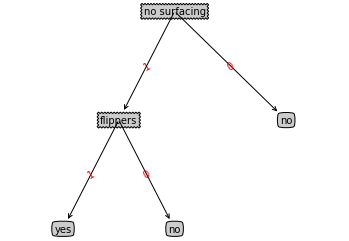

**********************************************************************
[3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3]
[['1' '1' '1' '1' '3']
 ['1' '1' '1' '2' '2']
 ['1' '1' '2' '1' '3']
 ['1' '1' '2' '2' '1']
 ['1' '2' '1' '1' '3']
 ['1' '2' '1' '2' '2']
 ['1' '2' '2' '1' '3']
 ['1' '2' '2' '2' '1']
 ['2' '1' '1' '1' '3']
 ['2' '1' '1' '2' '2']
 ['2' '1' '2' '1' '3']
 ['2' '1' '2' '2' '1']
 ['2' '2' '1' '1' '3']
 ['2' '2' '1' '2' '2']
 ['2' '2' '2' '1' '3']
 ['2' '2' '2' '2' '3']
 ['3' '1' '1' '1' '3']
 ['3' '1' '1' '2' '3']
 ['3' '1' '2' '1' '3']
 ['3' '1' '2' '2' '1']
 ['3' '2' '1' '1' '3']
 ['3' '2' '1' '2' '2']
 ['3' '2' '2' '1' '3']
 ['3' '2' '2' '2' '3']] <class 'numpy.ndarray'> ['age', 'prescript', 'astigmatic', 'tearRate'] <class 'list'>
[2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3]
[['1' '1' '1' '2']
 ['1' '1' '2' '1']
 ['1' '2' '1' '2']
 ['1' '2' '2' '1']
 ['2' '1' '1' '2']
 ['2' '1' '2' '1']
 ['2' '2' '1' '2']
 ['2' '2' '2' '3']
 ['3' '1' '1' '3']
 ['3' '1'

In [180]:
"""
    决策树(手撕代码:ID3算法实现)
        - 决策树采用的是信息熵或者Gini系数来作为分类标准(手动计算时使用)
            - 信息熵：是度量样本集合纯度的常用指标，该值越大，表示该集合纯度越低(混乱度越大)；该值越小，表示该集合纯度越高(混乱度越低)
                                        |y|
                - 信息熵公式 Ent(D) =  -   ∑  Pₖlog₂Pₖ
                                        k=1
                    - D                         总样本空间
                    - Pₖ                        子样本空间占总样本空间比值
                    - y                         结果集
            - Gini系数（CART算法使用） 反映了从数据集中随机选择两个样本，类别不一致的概率。因此，基尼系数越小，数据集的纯度越高。CART决策树
                    (Classification And Regression Tree)使用基尼系数进行划分属性选择。
                - Gini系数公式
                                 K                    K
                    - Gini(p) =  ∑   Pₖ(1 - Pₖ) = 1 -  ∑ Pₖ²
                                K=1                  K=1
                    - 数据集下根据属性a划分的基尼系数
                                           v    Dᵛ
                        Gini_index(D,a) =  ∑   ———— Gini(Dᵛ)
                                          v=1   D
            - 信息增益（ID3算法使用）  决策树根据属性进行判断，将具有相同属性的样本划分到相同的节点下面，此时，样本较划分之前具有更高的纯度，信息熵值有所下
                       降。此时，使用划分前的信息熵减去划分后的信息熵就可以得到决策树在划分前后获得的信息增益。
                                        v   Dᵛ
                - Gain(D,a) = Ent(D) -  ∑  ————  Ent(Dᵛ)
                                       v=1  D
                    - D                                 样本集合
                    - a                                 特征
                    - v                                 表示特征a可能的取值种类
                    - Dᵛ/D                              表示经过特征a划分之后每一个类别的权重。
                    - Ent(D)                            信息熵
                    - Ent(Dᵛ)                           子样本信息熵

            - 增益率（C4.5算法使用） 增益率不直接使用信息增益，而是使用信息增益与信息熵的比值作为衡量特征优劣的标准，C4.5算法就是使用增益率作为标准选择最优
                     划分属性。
                                        Gain(D,a)
                    - Gainᵣatio(D,a) =   ————————
                                          IV(a)
                                        v   Dᵛ          Dᵛ
                        - IV(a) =    -  ∑  ————  log₂  ————                 信息熵
                                       v=1  D           D
                            - Dᵛ/D                              表示经过特征a划分之后每一个类别的权重。

"""
import sklearn.datasets as sd
# 打乱数据集用
import sklearn.utils as su
import sklearn.ensemble as se
import numpy as np

boston = sd.load_iris()
import pandas as pd




x, y = su.shuffle(boston.data, boston.target, random_state=7)
labels = boston.feature_names
result_target_names = boston.target_names


#如果用下面自定义数据集则需注释掉本代码
target_names_dict={}
for index,label in enumerate(result_target_names):
    target_names_dict[float(index)] = label







#划分训练集和测试集
train_size= int(len(x)*0.8)
train_x,train_y,test_x,test_y = x[:train_size],y[:train_size].reshape(-1,1),x[train_size:],y[train_size:].reshape(-1,1)


train_dataSet = np.hstack((train_x,train_y))
test_dataSet = np.hstack((test_x,test_y))
# data_labels =list(labels)

#可以用这个手写的数据集看图
dataSet=[
                [1,1,'yes'],
                [1,1,'yes'],
                [1,0,'no'],
                [0,1,'no'],
                [0,1,'no']
             ]
train_dataSet =np.array(dataSet)

target_names_dict= {"yes":"no surfacing","no":"flippers"}
labels=['no surfacing','flippers']



# data_labels.append("classification results")
# print(data_labels)
# df = pd.DataFrame(train_dataSet,columns=data_labels)
# df.to_csv("鸢尾花数据集.csv")



#计算信息熵
def calcInfoEntropy(dataSet):
    dataSet_length = len(dataSet)
    sub_sample_set = {}
    '''
                            |y|
      信息熵公式 Ent(D) =  -   ∑  Pₖlog₂Pₖ
                            k=1
    '''
    # 通过结果集划分子样本空间
    for row in dataSet:
        if row[-1] not in sub_sample_set:
            sub_sample_set[row[-1]] = 0
        sub_sample_set[row[-1]]+=1
    # print(sub_sample_set)
    #计算信息熵
    infoEntropy = 0.0
    for sub_sample in sub_sample_set:
        # 计算 Pₖ
        pk = sub_sample_set[sub_sample] / float(dataSet_length)
        # 计算香浓熵

        infoEntropy += pk * np.log2(pk)
    #返回计算好的信息熵
    return -infoEntropy

# 划分数据集
def split_dataSet(dataSet,column_index,unique_value):
    # print(dataSet,column_index,unique_value)
    new_dataSet = []
    for row in dataSet:
        if row[column_index]  == unique_value:
            sub_dataSet = list(row[:column_index])
            sub_dataSet.extend(row[column_index+1:])
            new_dataSet.append(sub_dataSet)
    return np.array(new_dataSet)

#选择最优特征
def choose_best_feature_to_split(dataSet):
    #计算未切割数据集信息熵
    infoEntropy = calcInfoEntropy(dataSet)
    #计算信息增益
    '''
                                    v   Dᵛ
            - Gain(D,a) = Ent(D) -  ∑  ————  Ent(Dᵛ)    信息增益越大,信息纯度越小(寻找纯度小的进行划分)
                                   v=1  D

    '''
    bestInfoGain = 0.0
    bestFeatureIndex = -1
    #单个样本长度(不包括最后一列结果集数据)



    trainset_row_length = len(dataSet[0])-1


    for column_index in range(trainset_row_length):
        # 获取样本集中特征列数据
        column_value = [row[column_index] for row in dataSet]
        # 获得特征列唯一值集合
        sub_sample_set = set(column_value)



        newInfoGain = 0.0
        '''
                   v   Dᵛ
           -  计算  ∑  ————  Ent(Dᵛ)
                  v=1  D
        '''
        for unique_value in sub_sample_set:
            subDataSet = split_dataSet(dataSet,column_index,unique_value)   #子表构成的数据集
            # print(newDataSet)
            #计算信息增益
            # Ent(Dᵛ)
            Entdv = calcInfoEntropy(subDataSet)   #子表信息熵


            newInfoGain += len(subDataSet) / float(len(dataSet)) * Entdv

        #获得信息熵
        infoGain = infoEntropy - newInfoGain
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeatureIndex = column_index

    return bestFeatureIndex

import operator

def majorityCnt(classList):
    class_count = {}
    for vote in classList:
        if vote not in class_count:
            class_count[vote]  = 0
        class_count[vote] += 1
    sorted_class_count = sorted(class_count.items(),key=operator.itemgetter(1),reverse=True)
    return sorted_class_count[0][0]

#创建决策树
def create_decision_tree(dataSet,labels):
    #获取最后一列类别标签
    class_list = [row[-1] for row in dataSet]
    try:
        class_list = list(map(int,class_list))
        class_list = [target_names_dict[n] for n in class_list]
    except Exception as e:
        pass
    # 用自定义数据集则需注释掉本行代码
    # class_list = [target_names_dict[n] for n in class_list]

    print(class_list)

    # print(class_list)
    # 类别完全相同则停止划分
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    # 遍历完所有特征时返回出现次数最多的分类信息
    if len(dataSet[0]) == 1:
        return majorityCnt(class_list)
    bestFeatureIndex = choose_best_feature_to_split(dataSet)
    # 拿到要切分的最优特征列名称
    bestFeatureLabel = labels[bestFeatureIndex]
    myTree = {bestFeatureLabel:{}}
    print(dataSet,type(dataSet),labels,type(labels))

    # 删除最优特征列标签
    del(labels[bestFeatureIndex])
    # 得到列表包含的所有特征值
    feature_cloumn_value = [row[bestFeatureIndex] for row in dataSet]
    sub_sample_set = set(feature_cloumn_value)
    for unique_value in sub_sample_set:
        # 删除最优特征列标签后剩下的标签
        subLabels = labels[:]

        myTree[bestFeatureLabel][unique_value] = create_decision_tree(split_dataSet(dataSet,bestFeatureIndex,unique_value),subLabels)
    return myTree


myTree = create_decision_tree(train_dataSet,labels)

print(myTree)



# myTree =create_decision_tree(test_dataSet,labels)
# print(myTree)




#绘制树形图
import matplotlib.pyplot as plt
decision_node = dict(boxstyle="sawtooth",fc="0.8")
leaf_node = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")
#获取树的叶子结点个数（确定图的宽度）
def get_leaf_num(tree):
    leaf_num = 0
    first_key = list(tree.keys())[0]
    next_dict = tree[first_key]
    for key in next_dict.keys():
        if type(next_dict[key]).__name__=="dict":
            leaf_num +=get_leaf_num(next_dict[key])
        else:
            leaf_num +=1
    return leaf_num
#获取数的深度（确定图的高度）
def get_tree_depth(tree):
    depth = 0
    first_key = list(tree.keys())[0]
    next_dict = tree[first_key]
    for key in next_dict.keys():
        if type(next_dict[key]).__name__ == "dict":
            thisdepth = 1+ get_tree_depth(next_dict[key])
        else:
            thisdepth = 1
        if thisdepth>depth: depth = thisdepth
    return depth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

def retruieveTree(i):
    listOfTrees = [
                {"no surfacing":{0:"no",1:{"flippers":{0:"no",1:"yes"}}}},
                {"no surfacing":{0:"no",1:{"flippers":{0:{"head":{0:'no',1:"yes"}},1:"no"}}}}
                   ]
    return listOfTrees[i]
#在父子节点间填充文本信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    # createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center",color ="red", rotation=30)
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center",color ="red", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = get_leaf_num(myTree)
    depth = get_tree_depth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decision_node)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[
                    key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leaf_node)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD



def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(get_leaf_num(inTree))
    plotTree.totalD = float(get_tree_depth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()
createPlot(myTree)

#创建决策树分类器
def classify(inputTree,featureLabels:"特征标签",testVec):

    firstStr = list(inputTree.keys())[0]

    secondDict = inputTree[firstStr]

    featureIndex = featureLabels.index(firstStr)   #将标签转化为索引
    # print(secondDict)
    classLabel = []
    for key in secondDict.keys():
        if testVec[featureIndex] == key:
            if type(secondDict[key]).__name__ == "dict":
                classLabel = classify(secondDict[key],featureLabels,testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

print("*" * 70)
# 预测隐形眼镜

with open("sklearn_data/lenses.data") as f:
    lenses = [inst.strip("\n").split("  ") for inst in f.readlines()]
    lensesLabels = ["age","prescript","astigmatic","tearRate"]

    lensesTree = create_decision_tree(np.array(lenses),lensesLabels)
    print(lensesTree)

In [ ]:
"""
    决策树(手撕代码:CART算法实现)
"""
import sklearn.datasets as sd
# 打乱数据集用
import sklearn.utils as su
import sklearn.ensemble as se
import numpy as np
#加载鸢尾花数据集
boston = sd.load_iris()
x, y = su.shuffle(boston.data, boston.target, random_state=7)
labels = boston.feature_names
result_target_names = boston.target_names


#如果用下面自定义数据集则需注释掉本代码
target_names_dict={}
for index,label in enumerate(result_target_names):
    target_names_dict[float(index)] = label







#划分训练集和测试集
train_size= int(len(x)*0.8)
train_x,train_y,test_x,test_y = x[:train_size],y[:train_size].reshape(-1,1),x[train_size:],y[train_size:].reshape(-1,1)


train_dataSet = np.hstack((train_x,train_y))
test_dataSet = np.hstack((test_x,test_y))


